# The Structural Connectome Embeddedness of Human Brain Functional Organization
> Authors: Weiyang Shi _et al._ @ Brainnetome Center, CASIA

> Date: October 2025


This tutorial is provided for demonstration purposes only, enabling users to reproduce the _CoDE_ computation pipeline and test its application on empirical fMRI data.

** All paths in this tutorial are relative paths.

## Part 1. Calculate CoDE

In [17]:
import os
import tqdm 
import numpy as np 
import pandas as pd 

from utils import get_CoDE_stat
from neuromaps.images import dlabel_to_gifti

In [18]:
atlas_file = '../data/space-fsLR_atlas-Brainnetome_den-91k_dseg.dlabel.nii'
atlas_tuple = dlabel_to_gifti(atlas_file)
sc = np.array(pd.read_csv('../data/sc_consensus.csv'))

Specify the path to the generated permutation index file for subsequent spin tests. 
To regenerate the index, simply replace the filename with one that does not exist in the `../data` folder, such as `../data/my_spin_nulls.npy`.

In [26]:
spin_path = '../data/spin_nulls.npy'

Application to QPP data corresponding to Figure 1b-h in the manuscript and Figure S1-S2 in Supplementary File.

In [23]:
save_path = '../results'
os.makedirs(save_path, exist_ok=True)

for QPP in ['QPP_1', 'QPP_2', 'QPP_3']:
    QPP_data = pd.read_csv(f'../data/{QPP}.csv')

    result = []

    for i in tqdm.trange(QPP_data.shape[1]):
        CoDE, p = get_CoDE_stat(sc, np.array(QPP_data)[:, i], spin_path, atlas_gii=atlas_tuple, norm_type='zscore', n_perm=10000) 
        result.append([list(QPP_data.columns)[i], CoDE, p])

    result_df = pd.DataFrame(result, columns=['TR', 'CoDE', 'pval'])
    result_df.to_csv(f'../{save_path}/{QPP}_CoDE.csv', index=False)

100%|██████████| 30/30 [00:17<00:00,  1.68it/s]


In [25]:
result_df = pd.read_csv(f'../{save_path}/QPP_1_CoDE.csv')
result_df

,TR,CoDE,pval
0,TR01,6.088349,0.0
1,TR02,6.216403,0.0
2,TR03,6.316767,0.0
3,TR04,6.396865,0.0
4,TR05,6.461639,0.0
5,TR06,6.514513,0.0
6,TR07,6.557476,0.0
7,TR08,6.590928,0.0
8,TR09,6.613586,0.0
9,TR10,6.621841,0.0


## Part 2. Plot results

In [13]:
import os
import pandas as pd 
import numpy as np
from utils import perm_correlation
from plot_correlation import plot_xy_correlation

import matplotlib.pyplot as plt
import seaborn as sns
import proplot as pplt
%matplotlib inline

In [14]:
plt.rcParams['font.sans-serif']=['Arial']
plt.rcParams.update({"font.size":6, 'axes.labelsize': 7})
is_save = True
save_path = '../results'
if save_path:
    os.makedirs(save_path, exist_ok=True)

In [3]:
color_dict = {}

colors =  ['#1E90FF', '#B0E2FF', '#EEEEEE', '#F5DEB3', '#FF7F00']
cmap_QPP1 = pplt.Colormap(colors, name='QPP1')
color_dict['QPP_1'] = colors

colors =  ['#686FC3', '#EEEEEE', '#F49C6C']
cmap_QPP2 = pplt.Colormap(colors, name='QPP2')
color_dict['QPP_2'] = colors

colors =  ['#AFD181', '#EEEEEE', '#EED35B']
cmap_QPP3 = pplt.Colormap(colors, name='QPP2')
color_dict['QPP_3'] = colors

cmap_dict = {'QPP_1': cmap_QPP1,
             'QPP_2': cmap_QPP2,
             'QPP_3': cmap_QPP3}

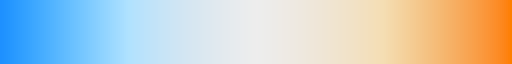

In [4]:
cmap_QPP1

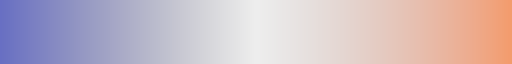

In [5]:
cmap_QPP2

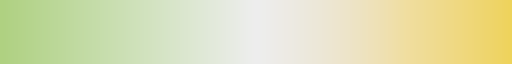

In [6]:
cmap_QPP3

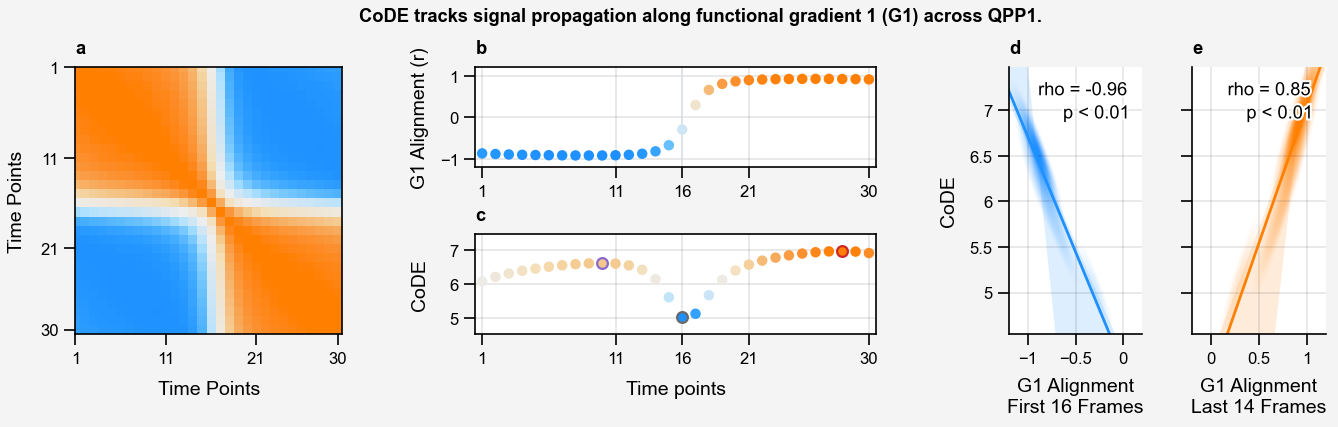

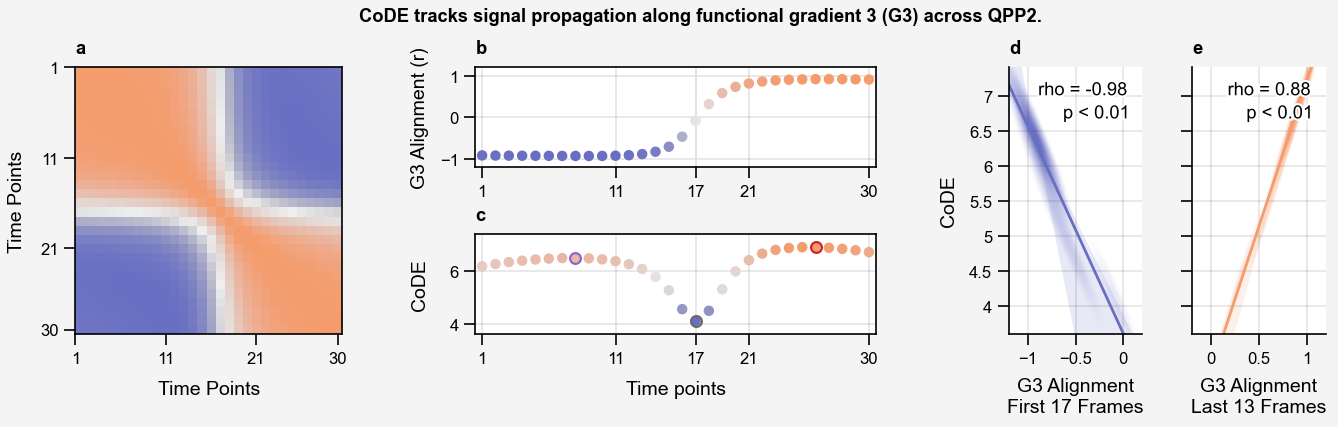

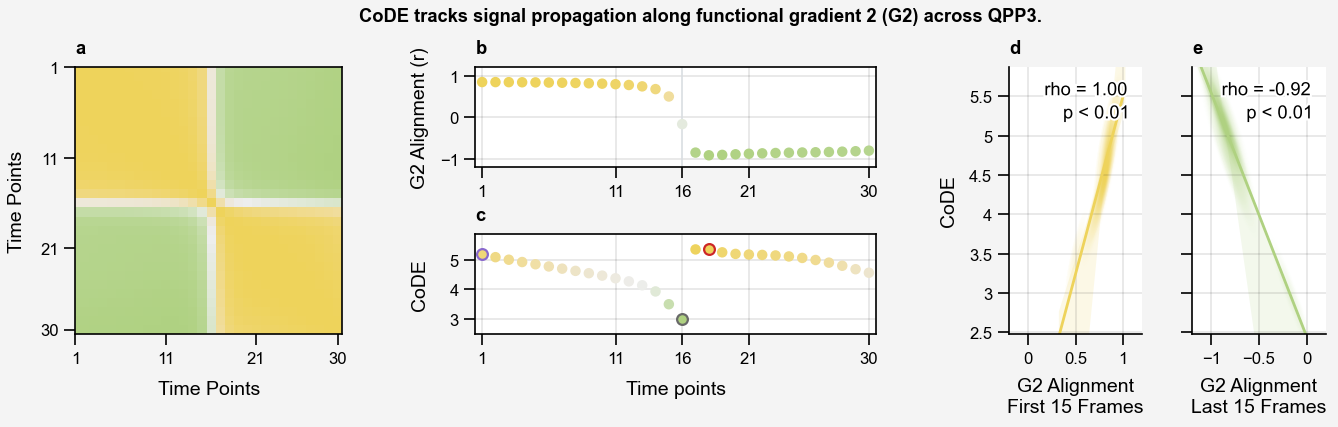

In [16]:
gradient_df = pd.read_csv('../data/func_gradient.csv')

for idx, QPP in enumerate(['QPP_1', 'QPP_2', 'QPP_3']): # , 'QPP_21', 'QPP_31'
    fig, axs = pplt.subplots([[1, 1, 2, 2, 2, 4, 5],
                              [1, 1, 3, 3, 3, 4, 5]],
                             refnum=1, refaspect=1, figwidth='17cm', share=False, wspace=(None, 8, None, None, 8, 3), hspace=(4))
    
    CoDE_df = pd.read_csv(f'../{save_path}/{QPP}_CoDE.csv', index_col=0)
    QPP_df  = pd.read_csv(f'../data/{QPP}.csv')

    map_data = np.array(QPP_df).T
    map_corr = np.corrcoef(map_data)

    if QPP == 'QPP_1':
        gradient_term = 'fcgradient01'
    elif QPP == 'QPP_2':
        gradient_term = 'fcgradient03'
    elif QPP == 'QPP_3':
        gradient_term = 'fcgradient02'

    frame_idx_bottom = np.argsort(np.array(CoDE_df.CoDE).reshape(-1))[0]
    frame_idx_top_1 = np.argsort(np.array(CoDE_df.CoDE).reshape(-1)[:frame_idx_bottom])[-1]
    frame_idx_top_2 = np.argsort(np.array(CoDE_df.CoDE).reshape(-1)[frame_idx_bottom:])[-1] + frame_idx_bottom

    gradient_map = np.array(gradient_df[gradient_term]).reshape(1, -1)
    gradient_alignment = np.corrcoef(gradient_map, map_data)[0, 1:]

    ylim_CoDE = (np.array(CoDE_df.CoDE).min()-0.5, np.array(CoDE_df.CoDE).max()+0.5)

    axs[0].heatmap(map_corr, cmap=cmap_dict[QPP], vmin=-1, vmax=1)
    axs[0].format(xlim=(0, 29.5), xlocator=list(range(0, 30, 10))+[29], xticklabels=[str(i+1) for i in list(range(0, 30, 10))] + ['30'])
    axs[0].format(ylim=(0, 29.5), ylocator=list(range(0, 30, 10))+[29], yticklabels=[str(i+1) for i in list(range(0, 30, 10))] + ['30'])
    axs[0].set_xlabel('Time Points', labelpad=5)
    axs[0].set_ylabel('Time Points', labelpad=5)
    axs[0].invert_yaxis()

    xlist = sorted(list(range(0, 30, 10))+[29] + [frame_idx_bottom])

    axs[1].vlines(frame_idx_bottom, -1.2, 1.2, lw=0.6, color='gray3')        
    axs[1].scatter(np.arange(30), gradient_alignment, 
                   marker='o', markersize=10, zorder=10,
                   c=gradient_alignment, cmap=cmap_dict[QPP])
    axs[1].format(xlim=(-0.5, 29.5), ylim=(-1.2, 1.2), xlocator=xlist, xticklabels=[str(i+1) for i in xlist], xtickminor=False, ytickminor=False)
    axs[1].set_xlabel('')
    axs[1].set_ylabel('G{} Alignment (r)'.format(gradient_term[-1]))

    axs[2].scatter(np.arange(30), np.array(CoDE_df.CoDE), 
                   marker='o', markersize=10, zorder=10,
                   c=np.array(CoDE_df.CoDE), cmap=cmap_dict[QPP])
    axs[2].format(xlim=(-0.5, 29.5), ylim=ylim_CoDE, 
                  xlocator=xlist, xticklabels=[str(i+1) for i in xlist], xtickminor=False, ytickminor=False)
    axs[2].scatter(frame_idx_top_1, np.array(CoDE_df.CoDE)[frame_idx_top_1],
                   facecolors='none',
                   edgecolors='#8968CD',
                   linewidths=0.8, s=15, zorder=50)
    axs[2].scatter(frame_idx_bottom, np.array(CoDE_df.CoDE)[frame_idx_bottom],
                   facecolors='none',
                   edgecolors='#696969',
                   linewidths=0.8, s=15,zorder=50)
    axs[2].scatter(frame_idx_top_2, np.array(CoDE_df.CoDE)[frame_idx_top_2],
                   facecolors='none',
                   edgecolors='#CD2626',
                   linewidths=0.8, s=15, zorder=50)
    axs[2].set_xlabel('Time points', labelpad=5)
    axs[2].set_ylabel('CoDE', labelpad=7.5)


    colors = [cmap_dict[QPP](i) for i in np.linspace(0, 1, 30)]
    
    if gradient_alignment[0] > 0:
        num_point = np.sum(gradient_alignment > 0)
    else:
        num_point = np.sum(gradient_alignment < 0)

    x = gradient_alignment[:num_point]
    y = np.array(CoDE_df.CoDE)[:num_point]
    corr_trace = np.zeros((x.shape[0], 2))
    corr_trace[:, 0] = x
    corr_trace[:, 1] = y
    corr_trace = pd.DataFrame(corr_trace, columns=['Gradient_align', 'CoDE'])
    r, p = perm_correlation(x, y, 10000, type='spearman')
    plot_xy_correlation(axs[3], corr_trace, x='Gradient_align', y='CoDE', r=r, p=p, corr_type='spearman', colors=color_dict[QPP])
    if x[0] < 0:
        axs[3].format(ylabel='CoDE', xlim=(-1.2, 0.2), ylim=ylim_CoDE, xlocator=[-1, -0.5, 0], 
                      xlabel='G{} Alignment\nFirst {} Frames'.format(gradient_term[-1], x.shape[0]), 
                      xtickminor=False, ytickminor=False)
    else:
        axs[3].format(ylabel='CoDE', xlim=(-0.2, 1.2), ylim=ylim_CoDE, xlocator=[0, 0.5, 1], 
                      xlabel='G{} Alignment\nFirst {} Frames'.format(gradient_term[-1], x.shape[0]), 
                      xtickminor=False, ytickminor=False)
    axs[3].spines['top'].set_visible(False)
    axs[3].spines['right'].set_visible(False)
    

    x = gradient_alignment[num_point:]
    y = np.array(CoDE_df.CoDE)[num_point:]
    corr_trace = np.zeros((x.shape[0], 2))
    corr_trace[:, 0] = x
    corr_trace[:, 1] = y
    corr_trace = pd.DataFrame(corr_trace, columns=['Gradient_align', 'CoDE'])
    r, p = perm_correlation(x, y, 10000, type='spearman')
    plot_xy_correlation(axs[4], corr_trace, x='Gradient_align', y='CoDE', r=r, p=p, corr_type='spearman', colors=color_dict[QPP])
    if x[-1] < 0:
        axs[4].format(ylabel='', xlim=(-1.2, 0.2), ylim=ylim_CoDE, xlocator=[-1, -0.5, 0], 
                      xlabel='G{} Alignment\nLast {} Frames'.format(gradient_term[-1], x.shape[0]), 
                      xtickminor=False, ytickminor=False, yticklabels=[])
    else:
        axs[4].format(ylabel='', xlim=(-0.2, 1.2), ylim=ylim_CoDE, xlocator=[0, 0.5, 1], 
                      xlabel='G{} Alignment\nLast {} Frames'.format(gradient_term[-1], x.shape[0]), 
                      xtickminor=False, ytickminor=False, yticklabels=[])
    axs[4].grid(True, axis='y')
    axs[4].spines['top'].set_visible(False)
    axs[4].spines['right'].set_visible(False)
    # axs[4].spines['left'].set_visible(False)
    axs.format(abc='a', abcloc='l',
               suptitle='CoDE tracks signal propagation along functional gradient {} (G{}) across QPP{}.'.format(gradient_term[-1], gradient_term[-1], idx+1))
    
    if save_path:
        fig.save('{}/CoDE-{}-G{}.jpg'.format(save_path, QPP, gradient_term[-1]), dpi=300)
        